## Week 9 Lecture 2

Following a review of loss functions, we will explore probability distributions. Random sampling will help us to understand the probability distributions through observations. 

In [31]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats

### Loss Functions

We have a dataset about delays of flights.

In [21]:
delays = pd.read_csv('united_summer2015.csv')
delays

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
...,...,...,...,...
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1
13824,8/31/15,2013,EWR,-2


Plotting a histogram show that the data is skewed to the right.

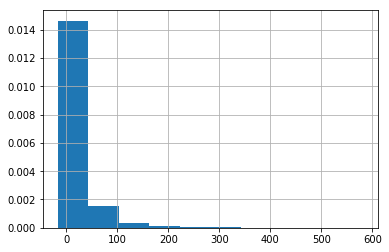

In [4]:
delays['Delay'].hist(density=True,);

Instead of apply a transformation, we will discard the outliers and plot on another scale.

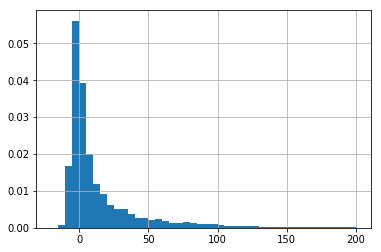

In [7]:
delays['Delay'].hist(density=True, bins=np.arange(-20, 201, 5));

We want to try mean square error and mean absolute error. We should write code implementing both functions.

In [10]:
def mse(theta, data):
    return np.mean((theta - data)**2)

In [11]:
mse(15, delays["Delay"])

1561.4356600361664

Let us try a few different values to spot candidates for the minimizer.

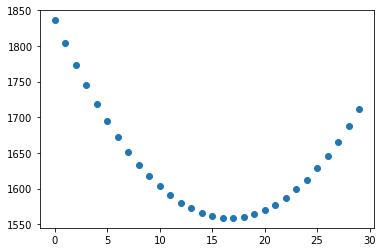

In [13]:
thetas = np.arange(30)
mse_vals = [mse(theta, delays["Delay"]) for theta in thetas]

plt.scatter(x=thetas, y=mse_vals);

Since we know that the minimizer is the mean, we can compare to the scatter-plot

In [16]:
theta_hat = np.mean(delays['Delay'])
print("Minimizer is {}\n".format(theta_hat))
print("Minimum value is {}\n".format(mse(theta_hat, delays['Delay']))) 

Minimizer is 16.658155515370705

Minimum value is 1558.6861803230322



If we did not know about the relationship between the minimizer and the mean, then we could try to guess the value by studying the values around the apparent minimizer.

In [22]:
df_thetas = pd.DataFrame({
    "theta": thetas,
    "mse": [mse(theta, delays["Delay"]) for theta in thetas]
})
df_thetas.sort_values("mse")

,theta,mse
17,17,1558.803038
16,16,1559.119349
18,18,1560.486727
...,...,...
2,2,1773.547703
1,1,1803.864014
0,0,1836.180325


We can take a similar approach to the mean absolute error. 

In [26]:
def mae(theta, data):
    return np.mean(np.abs(theta - data))

In [27]:
mae(10, delays['Delay'])

20.74003616636528

We know that the median will minimize the values. First let us try to guess the values.

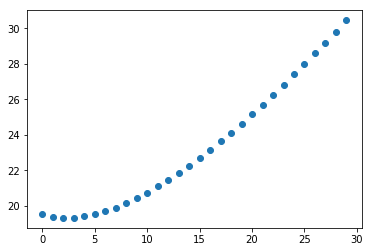

In [29]:
thetas = np.arange(30)
mae_vals = [mae(theta, delays["Delay"]) for theta in thetas]

plt.scatter(x=thetas, y=mae_vals);

In [28]:
df_thetas = pd.DataFrame({
    "theta": thetas,
    "mae": [mae(theta, delays["Delay"]) for theta in thetas]
})
df_thetas.sort_values("mae")

,theta,mae
2,2,19.327812
3,3,19.331501
1,1,19.393562
...,...,...
27,27,29.187559
28,28,29.804195
29,29,30.432116


How does it compare to the median?

In [30]:
theta_hat = np.median(delays['Delay'])
print("Minimizer is {}\n".format(theta_hat))
print("Minimum value is {}\n".format(mae(theta_hat, delays['Delay']))) 

Minimizer is 2.0

Minimum value is 19.32781193490054



Note that the mean is larger than the median because of the skew. Note that the minimum value for mean absolute error is much smaller than mean square error. 

### Distributions

A stem-plot displays the probability distribution function of a random variable that takes discrete values.

In [34]:
def plot_pmf(xs, probs, rv_name='X'):
    plt.plot(xs, probs, 'bo', ms=12, mec='b', color='b')
    plt.vlines(xs, 0, probs, colors='b', lw=4)
    plt.xlabel('$x$')
    plt.ylabel('$P(X = x)$')
    plt.ylim(0, 1)
    plt.title('PMF of $X$');

We can try a few values of the Binomial Distribution. Here we have $n=8$ and $p=0.5$.

Text(0.5, 1.0, 'PMF of X ~ Binom(8, 0.5)')

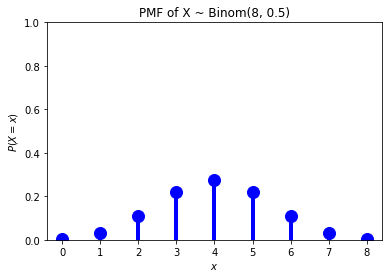

In [35]:
n = 8
p = 0.5
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})')

Here we have $n=8$ and $p=0.2$.

Text(0.5, 1.0, 'PMF of X ~ Binom(8, 0.2)')

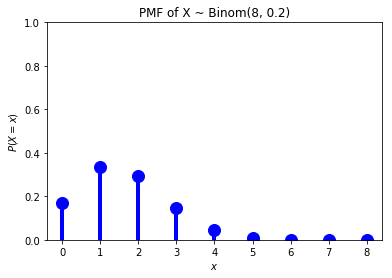

In [109]:
n = 8
p = 0.2
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})')

Note how the values are not symmetric for probabilities besides 0.5. We could compute these values ourselves. For example,

In [42]:
stats.binom.pmf(1, 8, 0.2)

0.33554432000000006

In [41]:
8 * (0.2)**1 * (0.8)**7

0.3355443200000001

### Simulation 

Recall from Homework 1 that we randomly sampled from a population to understanding elections. Excluding third party candidates, the probability distribution was binomial distribution. We used `np.random.multinomial` for the simulation. Instead we can write our own version.

In [50]:
def simulate_bernoulli(probability):
    if np.random.rand() < probability:
        return 1
    else:
        return 0 

In [67]:
simulate_bernoulli(0.2)

1

Having simulated a Bernoulli random variable, we can add them togeter to simulate a Binomial random variable.

In [68]:
def simulate_binomial(number, probability):
    return sum([simulate_bernoulli(probability) for iteration in range(number)])

In [86]:
simulate_binomial(8, 0.2)

4

If we simulate over many trials, then we should generate a histrogram that resembles the probability distribution.

In [98]:
number_simulations = 1000000
number = 8 
probability = 0.2

simulated_values = []
for iteration in range(number_simulations):
    simulated_values.append(simulate_binomial(number, probability))

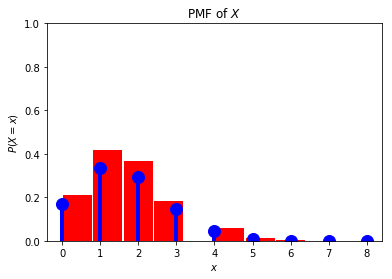

In [99]:
plt.hist(simulated_values, density = True, rwidth = 0.95, color = "r")

n = 8
p = 0.2
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys);

Note that we obtain similar results using `np.random.multinomial`.

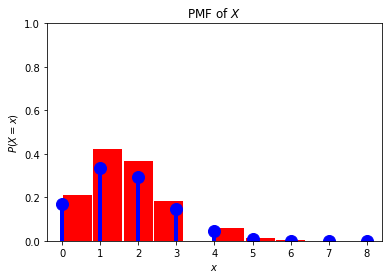

In [107]:
plt.hist([np.random.multinomial(8,[0.2, 0.8])[0] for iteration in range(number_simulations)], density = True, rwidth = 0.95, color = "red")

n = 8
p = 0.2
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys);